Disciplina: SCC5948_Ciência_de_dados

Normando de Campos Amazonas Filho

NUSP: 11561949

#Transformações em dados heterogêneos

In [ ]:
import pandas as pd
import numpy as np

### Parte 1
Nessa primeira parte, vamos utilizar o conjunto de dados Iris com modificações (`iris_modif.data`).

In [ ]:
iris = pd.read_csv('iris_modif.data', header=None, index_col=0)
iris

,1,2,3,4,5,6
0,,,,,,
0,4.9,3.0,49.0,1.4,0.2,Iris-setosa
1,4.7,3.2,47.0,1.3,0.2,Iris-setosa
2,4.6,3.1,46.0,1.5,0.2,Iris-setosa
3,5.0,3.6,50.0,1.4,0.2,Iris-setosa
4,5.4,3.9,54.0,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
153,67.0,33.0,670.0,57.0,21.0,Iris-virginica
154,79.0,38.0,790.0,64.0,20.0,Iris-virginica
155,61.0,28.0,610.0,47.0,12.0,Iris-versicolor


### Questão 01.

* Utilizando as técnicas de visualização apresentadas até agora, verifique para cada atributo se existem outliers interpretando sua vizualização.
* Aplique a técnica de Winsorização nos atributos que possuem outliers utilizando o 90º percentil do atributo dentro da classe que o exemplo pertence como limite superior.
* Calcule a cerca inferior (LF) e superior (UF) para cada um dos atributos. Para ser considerados outliers, os valores devem estar além das cercas inferior ou superior.
* Compare os resultados obtidos para cada atributo com os obtidos pela tec. de Winsorização.


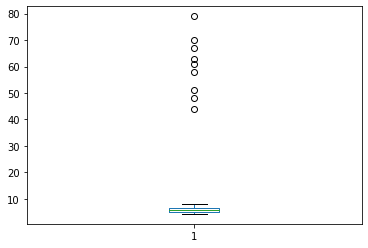

In [ ]:
iris[1].plot.box()

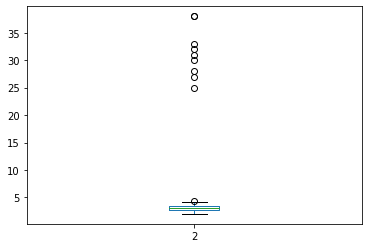

In [ ]:
iris[2].plot.box()

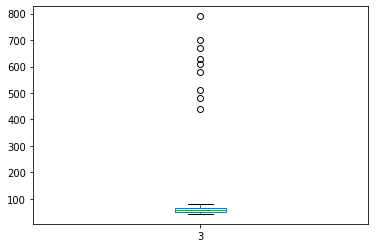

In [ ]:
iris[3].plot.box()

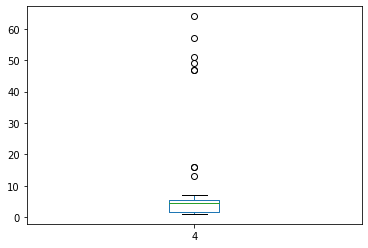

In [ ]:
iris[4].plot.box()

### Resposta: Pelo box plot, todos os atributos possuem valores consideravelmente acima da maior densidade da distribuição, e podem ser considerados outliers

In [ ]:
def rm_outlier(df, attr_name):
  new_df = df.copy(deep=True)
  # Agrupa o conjunto utilizando a coluna 6 (classe) e computa o quantil para cada coluna para cada classe
  q = df.groupby(by=6).quantile(0.90)
  for idx, row in df.iterrows():
    # Se o valor do atributo para esse linha é maior do que o valor do atributo permitido para a classe dele,
    # trocar o valor pelo 90º percentil
    if row[attr_name] > q.loc[row[6]][attr_name]:
      new_df.at[idx, attr_name] = q.loc[row[6]][attr_name]
  return new_df
for i in range(1, 5):
  iris = rm_outlier(iris, i)
iris

,1,2,3,4,5,6
0,,,,,,
0,4.90,3.00,49.0,1.40,0.2,Iris-setosa
1,4.70,3.20,47.0,1.30,0.2,Iris-setosa
2,4.60,3.10,46.0,1.50,0.2,Iris-setosa
3,5.00,3.60,50.0,1.40,0.2,Iris-setosa
4,5.40,3.90,54.0,1.70,0.4,Iris-setosa
...,...,...,...,...,...,...
153,7.70,3.56,77.0,6.68,21.0,Iris-virginica
154,7.70,3.56,77.0,6.68,20.0,Iris-virginica
155,6.78,3.20,67.8,4.90,12.0,Iris-versicolor


### Questão 02.
* Identifique visualmente ou programaticamente se existem atributos reduntantes nessa base. Caso exista, crie um novo `Dataframe` sem eles.
* **Dica**: Atributos redundantes são aqueles que trazem a mesma informação ou que seja possível calcular um a partir do outro. Por exemplo: Data de aniversário e idade.

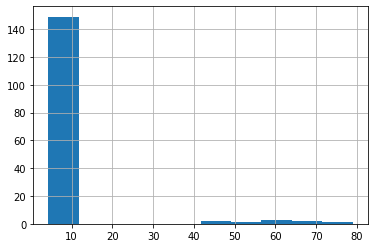

In [ ]:
iris[1].hist()

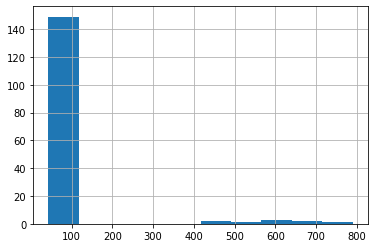

In [ ]:
iris[3].hist()

In [ ]:
print((iris[3]/10 == iris[1]).all())

True


### Pelo histograma, os atributos 1 e 3 parecem ter exatamente a mesma distribuição. Porém com uma ordem de magnitude de diferença. Por código podemos verificar que todos os valores do atributo '3' são exatamente iguais ao do atributo '1' só que divididos por 10. Por isso podemos remove-lo.

In [ ]:
iris_novo = iris.drop(columns=3)
iris_novo

,1,2,4,5,6
0,,,,,
0,4.90,3.00,1.40,0.2,Iris-setosa
1,4.70,3.20,1.30,0.2,Iris-setosa
2,4.60,3.10,1.50,0.2,Iris-setosa
3,5.00,3.60,1.40,0.2,Iris-setosa
4,5.40,3.90,1.70,0.4,Iris-setosa
...,...,...,...,...,...
153,7.70,3.56,6.68,21.0,Iris-virginica
154,7.70,3.56,6.68,20.0,Iris-virginica
155,6.78,3.20,4.90,12.0,Iris-versicolor


### Questão 03.

*   Assumindo que o atributo '1' segue uma distribuição normal, calcule a probabilidade de uma observação X deste atributo estar no intervalo 5.045 < X < 6.741.
* Verifique quais outros atributos possuem esta mesma probabilidade para valores nesta mesma faixa. Neste caso, eles seguem uma distribuição normal?

In [ ]:
from scipy.stats import norm

def view(df, nome_attr):
  df.hist(nome_attr, density=1)
  df[nome_attr].plot.kde()
  normal = pd.Series(norm.rvs(df[nome_attr].mean(), df[nome_attr].std(), size=100000))
  normal.plot.kde()

view(iris_novo, 1)

NameError: ignored

In [ ]:
media = iris_novo[1].mean()
desvio_padrao = iris[1].std()
print(media - desvio_padrao)
print(media + desvio_padrao)

5.045828579859101
6.741006863178876


### Resposta: O intervalo do enunciado é aproximadamente:

`media - desvio_padrao <  X < media + desvio padrão`,

por isso a probabilidade de X estar dentro deste intervalo é de 68%


### Parte 2
Nos próximos exercícios utilizaremos um dataset com 13 variáveis de entrada e 1 variável de saída (num). O dataset pode ser encontrado no arquivo "clv_heart_disease.csv".
Existem valores faltantes nesse dataset, representados pelo caractere "?".


In [ ]:
# na_values diz para o Pandas qual simbolo representa valores faltantes
dados = pd.read_csv('clv_heart_disease.data', na_values='?')
dados.info()

### Questão 01.

*   Crie uma lista com o nome das variáveis numéricas e uma com o nome das variáveis categóricas

In [ ]:
# Criamos um vetor com o nome das classes desejadas
features_numericos = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'fbs']
features_categoricos = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

### Questão 02.

*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média.

*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Criando os pipelines
pipeline_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

pipeline_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

# Criando a transformação do conjunto de dados:
transformacao = ColumnTransformer(
    transformers=[
        ('transformacao numerica', pipeline_numerico, features_numericos),
        ('transformacao categorica', pipeline_categorico, features_categoricos),
    ])

# Aplicando a transformação no dataset:
dados_transformados = transformacao.fit_transform(dados)

In [ ]:
dados_numericos = dados_transformados[:, :7]

### Questão 03.

*     ***Utilizando apenas os atributos numéricos do exercício anterior***, reduza a dimensionalidade do conjunto de dados resultante da questão anterior utilizando a técnica PCA (`sklearn.decomposition.PCA`). Reduza a dimensionalidade de forma que no mínimo 80% da variância dos dados seja mantida (atente-se ao atributo  `explained_variance_ratio_`).

*   Exiba os componentes principais em uma tabela.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
# Sem o label
dados_pca = pca.fit_transform(dados_numericos)

print("As %d componentes principais explicam %.2f%% da variancia dos dados originais" % (len(pca.components_), pca.explained_variance_ratio_.sum() * 100))
component_names = ['component {}'.format(i) for i in range(len(pca.components_))]
components_df = pd.DataFrame(data=pca.components_.T, columns=component_names)
components_df.head()